# Description

This note book is to determine the type of equilibrium on each levl of initial mask coverage.

In [1]:
from myfunctions import *
import numpy as np
import pandas as pd

In [2]:
def GRBTp1q0_growth(m=0.2,I_0=0.05,vo=0.5,mix=False):

    # 前面兩期的死亡人數
    d0 = (1-(17/18)**14) * 0.0138 * I_0
    Nation = Threeperiod_SIRD(S=1-I_0,I=I_0,q_0=m,q1_0=0,q1_1=0)
    Nation.serveralupdates(2)
    d1_phi, d1_n = Nation.d1_0, Nation.d1_1

    m0,m1,m2=m,m,1.15*m

    q1_0_coef=(1-d0)*(1-m0)
    q1_1_coef=(1-d0)*m0
    q1_0 = min(m1/q1_0_coef,1)
    q1_1 = (m1-q1_0_coef)/q1_1_coef if q1_0==1 else 0

    
    if q1_0<1:
        q2_00_coef=(1-q1_0)*(1-d0)*(1-d1_phi)*(1-m0)
        q2_01_coef=q1_0*(1-d0)*(1-d1_phi)*(1-m0)
        q2_10_coef=(1-d0)*(1-d1_n)*m0

        q2_10 = min(m2/q2_10_coef,1)
        q2_00 = min((m2-q2_10_coef)/q2_00_coef,1) if q2_10==1 else 0
        q2_11 = 1 if q2_00==1 else 0
        q2_01 = (m2-q2_10_coef-q2_00_coef)/q2_01_coef if q2_00==1 else 0

    else:
        q2_10_coef=(1-q1_1)*(1-d0)*(1-d1_n)*m0
        q2_11_coef=q1_1*(1-d0)*(1-d1_n)*m0
        q2_01_coef=(1-d0)*(1-d1_phi)*(1-m0)

        q2_10 = min(m2/q2_10_coef,1)
        q2_00 = 1 if q2_10==1 else 0 # 係數為 0 ，不影響 IC 條件
        q2_11 = min((m2-q2_10_coef)/q2_11_coef,1) if q2_10==1 else 0
        q2_01 = (m2-q2_10_coef-q2_11_coef)/q2_01_coef if q2_11==1 else 0

    phi_sign = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*q2_00
    phi_nsign= q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*q2_10
    n_sign   = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*(vo+q2_00)
    n_nsign  = q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*(vo+q2_10)

    ICphi = phi_sign-phi_nsign
    ICn   = n_sign-n_nsign
    
    return m0,m1,m2,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01

def GRBTp1q1_growth(m=0.2,I_0=0.05,vo=0.5,mix=False):
    # 前面兩期的死亡人數
    d0 = (1-(17/18)**14) * 0.0138 * I_0
    Nation = Threeperiod_SIRD(S=1-I_0,I=I_0,q_0=m,q1_0=0,q1_1=0)
    Nation.serveralupdates(2)
    d1_phi, d1_n = Nation.d1_0, Nation.d1_1


    m0,m1,m2=m,m,1.15*m

    q1_0_coef=(1-d0)
    q1_0 = m1/q1_0_coef
    q1_1 = 0

    q2_00_coef=(1-q1_0)*(1-d0)*( (1-d1_phi)*(1-m0)+(1-d1_n)*m0 )
    q2_01_coef=q1_0*(1-d0)*( (1-d1_phi)*(1-m0)+(1-d1_n)*m0 )

    q2_10 = 1
    q2_00 = min(m2/q2_00_coef,1) if q2_10==1 else 0
    q2_11 = 1 if q2_00==1 else 0
    q2_01 = (m2-q2_00_coef)/q2_01_coef if q2_00==1 else 0

    phi_sign = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*q2_00
    phi_nsign= q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*q2_10
    n_sign   = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*(vo+q2_00)
    n_nsign  = q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*(vo+q2_10)

    ICphi = phi_sign-phi_nsign
    ICn   = n_sign-n_nsign
    
    return m0,m1,m2,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
    
def GRBTp0q0_growth(m=0.2,I_0=0.05,vo=0.5,mix=False):
    # 前面兩期的死亡人數
    d0 = (1-(17/18)**14) * 0.0138 * I_0
    Nation = Threeperiod_SIRD(S=1-I_0,I=I_0,q_0=m,q1_0=0,q1_1=0)
    Nation.serveralupdates(2)
    d1_phi, d1_n = Nation.d1_0, Nation.d1_1

    m0,m1,m2=m,m,1.15*m

    q1_1_coef=(1-d0)
    q1_0 = 1
    q1_1 = m1/q1_1_coef

    q2_10_coef=(1-q1_1)*(1-d0)*( (1-d1_phi)*(1-m0)+(1-d1_n)*m0 )
    q2_11_coef=q1_1*(1-d0)*( (1-d1_phi)*(1-m0)+(1-d1_n)*m0 )


    q2_10 = min(m2/q2_10_coef,1)
    q2_00 = 1 if q2_10==1 else 0 # 係數為 0 ，不影響 IC 條件
    q2_11 = (m2-q2_10_coef)/q2_11_coef if q2_10==1 else 0
    q2_01 = 0

    phi_sign = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*q2_00
    phi_nsign= q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*q2_10
    n_sign   = q1_0*(1+q2_01+(1-q2_01)*vo) + (1-q1_0)*(vo+q2_00)
    n_nsign  = q1_1*(1+q2_11+(1-q2_11)*vo) + (1-q1_1)*(vo+q2_10)

    ICphi = phi_sign-phi_nsign
    ICn   = n_sign-n_nsign
    
    return m0,m1,m2,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01

    


In [3]:
m_vals=np.linspace(0.1,0.8,40)
result=map(lambda x: GRBTp1q0_growth(x,I_0=0.01,vo=0.5),m_vals)
result=list(result)
datap1q0=pd.DataFrame.from_records(result, columns =['m0','m1','m2','ICphi', 'ICn','q1_0','q1_1','q2_10','q2_00','q2_11','q2_01'])

result=map(lambda x: GRBTp1q1_growth(x,I_0=0.01,vo=0.5),m_vals)
result=list(result)
datap1q1=pd.DataFrame.from_records(result, columns =['m0','m1','m2','ICphi', 'ICn','q1_0','q1_1','q2_10','q2_00','q2_11','q2_01'])

result=map(lambda x: GRBTp0q0_growth(x,I_0=0.01,vo=0.5),m_vals)
result=list(result)
datap0q0=pd.DataFrame.from_records(result, columns =['m0','m1','m2','ICphi', 'ICn','q1_0','q1_1','q2_10','q2_00','q2_11','q2_01'])

In [4]:
# [(datap1q0.ICphi>0) & (datap1q0.ICn<0),(datap1q1.ICphi>0) & (datap1q1.ICn>0),(datap0q0.ICphi<0) & (datap0q0.ICn<0)]
# (datap1q0.ICphi>0) & (datap1q0.ICn<0)

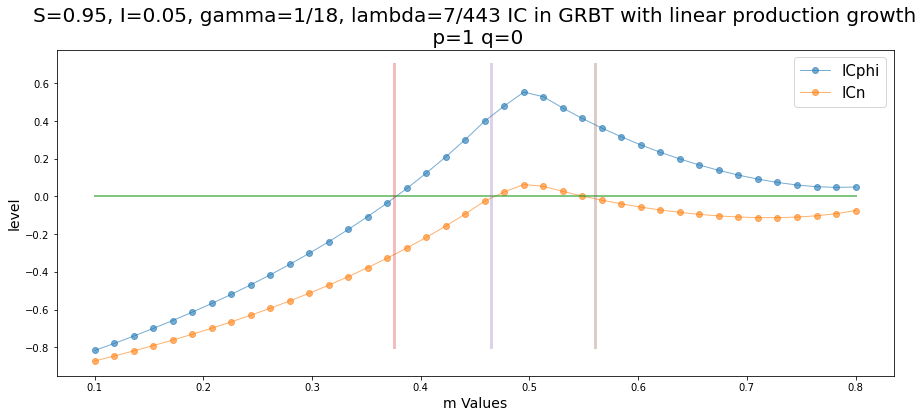

In [13]:
fig, ax=plt.subplots(figsize=(15, 6))

ax.plot(datap1q0.m0,datap1q0.ICphi, 'o-', lw=1, alpha=0.6,label="ICphi")
ax.plot(datap1q0.m0,datap1q0.ICn, 'o-', lw=1, alpha=0.6,label="ICn")
ax.plot(datap1q0.m0,[0]*40, '-', lw=2, alpha=0.6)



#成長的分界線
ax.plot([0.375]*40,np.linspace(-0.8,0.7,40), '-', lw=3, alpha=0.3)
ax.plot([0.465]*40,np.linspace(-0.8,0.7,40), '-', lw=3, alpha=0.3)
ax.plot([0.56]*40,np.linspace(-0.8,0.7,40), '-', lw=3, alpha=0.3)

ax.set_xlabel('m Values', fontsize=14)
ax.set_ylabel('level', fontsize=14)
# ax.set_title("S=0.95, I=0.05, gamma=1/18, lambda=7/443 IC in GRBT with linear production growth\n p=1 q=0",fontsize=20)
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend(fontsize=15)
plt.show()

In [6]:
datap1q0

,m0,m1,m2,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
0,0.100000,0.100000,0.115000,-0.816638,-0.872198,0.111120,0.000000,1,0.018768,0,0.000000
1,0.117949,0.117949,0.135641,-0.779326,-0.846192,0.133731,0.000000,1,0.023177,0,0.000000
2,0.135897,0.135897,0.156282,-0.740464,-0.819105,0.157282,0.000000,1,0.028020,0,0.000000
3,0.153846,0.153846,0.176923,-0.699953,-0.790869,0.181832,0.000000,1,0.033366,0,0.000000
4,0.171795,0.171795,0.197564,-0.657686,-0.761409,0.207446,0.000000,1,0.039297,0,0.000000
5,0.189744,0.189744,0.218205,-0.613547,-0.730644,0.234195,0.000000,1,0.045914,0,0.000000
6,0.207692,0.207692,0.238846,-0.567407,-0.698485,0.262156,0.000000,1,0.053343,0,0.000000
7,0.225641,0.225641,0.259487,-0.519129,-0.664835,0.291413,0.000000,1,0.061745,0,0.000000
8,0.243590,0.243590,0.280128,-0.468559,-0.629589,0.322058,0.000000,1,0.071323,0,0.000000
9,0.261538,0.261538,0.300769,-0.415532,-0.592628,0.354194,0.000000,1,0.082344,0,0.000000


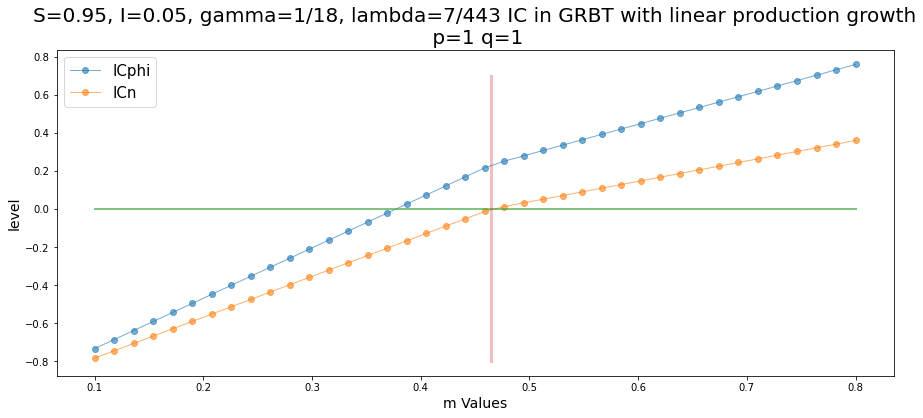

In [14]:
fig, ax=plt.subplots(figsize=(15, 6))

ax.plot(datap1q1.m0,datap1q1.ICphi, 'o-', lw=1, alpha=0.6,label="ICphi")
ax.plot(datap1q1.m0,datap1q1.ICn, 'o-', lw=1, alpha=0.6,label="ICn")
ax.plot(datap1q1.m0,[0]*40, '-', lw=2, alpha=0.6)

#分界線
ax.plot([0.465]*40,np.linspace(-0.8,0.7,40), '-', lw=3, alpha=0.3)
ax.set_xlabel('m Values', fontsize=14)
ax.set_ylabel('level', fontsize=14)
# ax.set_title("S=0.95, I=0.05, gamma=1/18, lambda=7/443 IC in GRBT with linear production growth\n p=1 q=1",fontsize=20)
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend(fontsize=15)
plt.show()

In [8]:
datap1q1

,m0,m1,m2,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
0,0.100000,0.100000,0.115000,-0.734952,-0.784956,0.100008,0,1,0.127820,0,0.000000
1,0.117949,0.117949,0.135641,-0.687381,-0.746359,0.117958,0,1,0.153828,0,0.000000
2,0.135897,0.135897,0.156282,-0.639810,-0.707764,0.135908,0,1,0.180916,0,0.000000
3,0.153846,0.153846,0.176923,-0.592239,-0.669168,0.153858,0,1,0.209154,0,0.000000
4,0.171795,0.171795,0.197564,-0.544669,-0.630573,0.171808,0,1,0.238615,0,0.000000
5,0.189744,0.189744,0.218205,-0.497100,-0.591979,0.189758,0,1,0.269380,0,0.000000
6,0.207692,0.207692,0.238846,-0.449530,-0.553384,0.207708,0,1,0.301540,0,0.000000
7,0.225641,0.225641,0.259487,-0.401961,-0.514790,0.225658,0,1,0.335190,0,0.000000
8,0.243590,0.243590,0.280128,-0.354392,-0.476196,0.243608,0,1,0.370437,0,0.000000
9,0.261538,0.261538,0.300769,-0.306823,-0.437603,0.261558,0,1,0.407397,0,0.000000


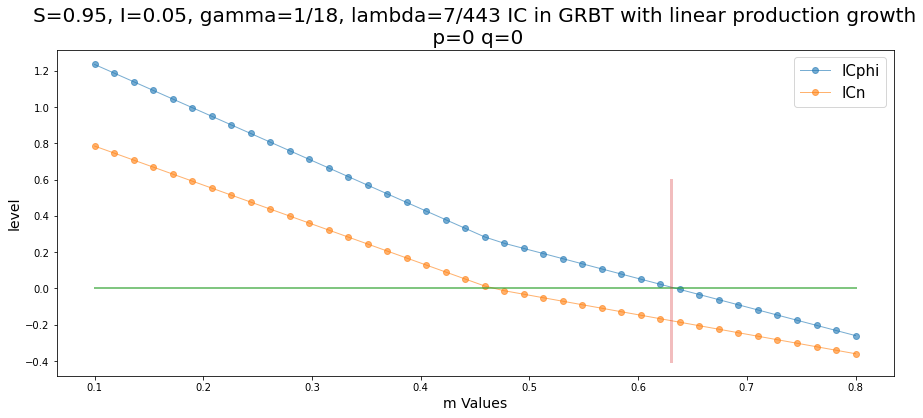

In [15]:
fig, ax=plt.subplots(figsize=(15, 6))

ax.plot(datap0q0.m0,datap0q0.ICphi, 'o-', lw=1, alpha=0.6,label="ICphi")
ax.plot(datap0q0.m0,datap0q0.ICn, 'o-', lw=1, alpha=0.6,label="ICn")
ax.plot(datap0q0.m0,[0]*40, '-', lw=2, alpha=0.6)

#分界線
ax.plot([0.63]*40,np.linspace(-0.4,0.6,40), '-', lw=3, alpha=0.3 )

ax.set_xlabel('m Values', fontsize=14)
ax.set_ylabel('level', fontsize=14)
# ax.set_title("S=0.95, I=0.05, gamma=1/18, lambda=7/443 IC in GRBT with linear production growth\n p=0 q=0",fontsize=20)
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.legend(fontsize=15)
plt.show()

In [10]:
datap0q0

,m0,m1,m2,ICphi,ICn,q1_0,q1_1,q2_10,q2_00,q2_11,q2_01
0,0.100000,0.100000,0.115000,1.234952,0.784956,1,0.100008,0.127820,0,0.000000,0
1,0.117949,0.117949,0.135641,1.187381,0.746359,1,0.117958,0.153828,0,0.000000,0
2,0.135897,0.135897,0.156282,1.139810,0.707764,1,0.135908,0.180916,0,0.000000,0
3,0.153846,0.153846,0.176923,1.092239,0.669168,1,0.153858,0.209154,0,0.000000,0
4,0.171795,0.171795,0.197564,1.044669,0.630573,1,0.171808,0.238615,0,0.000000,0
5,0.189744,0.189744,0.218205,0.997100,0.591979,1,0.189758,0.269380,0,0.000000,0
6,0.207692,0.207692,0.238846,0.949530,0.553384,1,0.207708,0.301540,0,0.000000,0
7,0.225641,0.225641,0.259487,0.901961,0.514790,1,0.225658,0.335190,0,0.000000,0
8,0.243590,0.243590,0.280128,0.854392,0.476196,1,0.243608,0.370437,0,0.000000,0
9,0.261538,0.261538,0.300769,0.806823,0.437603,1,0.261558,0.407397,0,0.000000,0
